In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

In [40]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [41]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [42]:
df = df.drop('Patient_ID', axis=1)

In [43]:
df['Age'].value_counts()

Age
72    2997
33    2946
29    2942
59    2917
40    2914
      ... 
45    2738
38    2735
66    2735
81    2732
84    2651
Name: count, Length: 75, dtype: int64

# Outlier detection on Age column, using IQR

In [44]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

In [45]:
IQR = Q3 - Q1

In [46]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
df[(df['Age'] < lower_bound) | (df['Age'] >upper_bound)]

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis


The age column has no outliers

In [48]:
df.groupby('Gender')['Age'].mean()

Gender
Female    51.921170
Male      51.914494
Name: Age, dtype: float64

In [49]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [50]:
df.groupby(['Country'])['Diagnosis'].count()

Country
Brazil         21413
China          31978
Germany        10557
India          42496
Japan          16867
Nigeria        31918
Russia         21297
South Korea    14965
UK             10642
USA            10558
Name: Diagnosis, dtype: int64

In [51]:
pd.get_dummies(df, columns=['Gender', 'Country', 'Ethnicity'], drop_first=True)

,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,66,No,Yes,No,No,No,No,9.37,1.67,6.16,...,False,False,True,False,False,False,False,True,False,False
1,29,No,Yes,No,No,No,No,1.83,1.73,10.54,...,False,False,False,False,False,False,False,False,True,False
2,86,No,No,No,No,No,No,6.26,2.59,10.57,...,False,True,False,False,False,False,False,True,False,False
3,75,No,No,No,No,No,No,4.10,2.62,11.04,...,False,False,False,False,False,False,True,False,False,False
4,35,Yes,Yes,No,No,No,No,9.10,2.11,10.71,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,No,No,No,No,Yes,No,2.00,0.64,11.92,...,False,False,False,False,False,False,True,False,False,False
212687,89,No,No,No,No,Yes,No,9.77,3.25,7.30,...,True,False,False,False,False,False,False,False,False,True
212688,72,No,No,No,No,No,Yes,7.72,2.44,8.71,...,False,True,False,False,False,False,False,False,True,False
212689,85,No,No,No,No,No,Yes,5.62,2.53,9.62,...,False,False,False,False,False,False,False,False,False,True


In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
categorical_columns = ['Gender', 'Country', 'Ethnicity']

In [54]:
encoder = OneHotEncoder(sparse_output=False)

In [55]:
for cat_column in categorical_columns:
    print(df[categorical_columns][cat_column].value_counts())
    print('==========================>')

Gender
Female    127527
Male       85164
Name: count, dtype: int64
==========================>
Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64
==========================>
Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64
==========================>


In [56]:
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [57]:
one_hot_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(212691, 17))

In [58]:
encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Country_Brazil', 'Country_China',
       'Country_Germany', 'Country_India', 'Country_Japan',
       'Country_Nigeria', 'Country_Russia', 'Country_South Korea',
       'Country_UK', 'Country_USA', 'Ethnicity_African',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern'], dtype=object)

In [59]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

In [60]:
one_hot_df

,Gender_Female,Gender_Male,Country_Brazil,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df = pd.concat([df.drop(columns=categorical_columns, axis=1), one_hot_df], axis=1)

In [62]:
df

,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,...,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,66,No,Yes,No,No,No,No,9.37,1.67,6.16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,No,Yes,No,No,No,No,1.83,1.73,10.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,86,No,No,No,No,No,No,6.26,2.59,10.57,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,No,No,No,No,No,No,4.10,2.62,11.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35,Yes,Yes,No,No,No,No,9.10,2.11,10.71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,No,No,No,No,Yes,No,2.00,0.64,11.92,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,89,No,No,No,No,Yes,No,9.77,3.25,7.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,72,No,No,No,No,No,Yes,7.72,2.44,8.71,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,85,No,No,No,No,No,Yes,5.62,2.53,9.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
ordinal = LabelEncoder()

In [65]:
df['Radiation_Exposure'].unique()

array(['Yes', 'No'], dtype=object)

In [66]:
df['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
df['Obesity'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
df['Diabetes'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
df["Iodine_Deficiency"].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df["Thyroid_Cancer_Risk"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [71]:
df['Family_History'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df['Diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [73]:
from sklearn.preprocessing import OrdinalEncoder

In [91]:
ordinal_encoder_yes_no_columns = OrdinalEncoder(categories=[['No', 'Yes']])
ordinal_encoder_level_columns = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
ordinal_encoder_diagnosis_column = OrdinalEncoder(categories=[['Benign', 'Malignant']])

In [82]:
ordinal_yes_no_columns = [
    "Radiation_Exposure",
    "Smoking",
    "Obesity",
    "Diabetes",
    "Iodine_Deficiency",
    "Family_History",
]

In [83]:
for column in ordinal_yes_no_columns:
    df[column] = ordinal_encoder_yes_no_columns.fit_transform(df[["Family_History"]])

In [89]:
df['Thyroid_Cancer_Risk'] = ordinal_encoder_level_columns.fit_transform(df[['Thyroid_Cancer_Risk']])

In [92]:
df['Diagnosis'] = ordinal_encoder_diagnosis_column.fit_transform(df[['Diagnosis']])

In [100]:
df

,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,...,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,66,0.0,0.0,0.0,0.0,0.0,0.0,9.37,1.67,6.16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,29,0.0,0.0,0.0,0.0,0.0,0.0,1.83,1.73,10.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,86,0.0,0.0,0.0,0.0,0.0,0.0,6.26,2.59,10.57,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,0.0,0.0,0.0,0.0,0.0,0.0,4.10,2.62,11.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35,1.0,1.0,1.0,1.0,1.0,1.0,9.10,2.11,10.71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.64,11.92,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,89,0.0,0.0,0.0,0.0,0.0,0.0,9.77,3.25,7.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,72,0.0,0.0,0.0,0.0,0.0,0.0,7.72,2.44,8.71,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,85,0.0,0.0,0.0,0.0,0.0,0.0,5.62,2.53,9.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
import seaborn as sns

In [102]:
df.iloc[:, 8:]

,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Gender_Female,Gender_Male,Country_Brazil,Country_China,Country_Germany,...,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1.67,6.16,1.08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.73,10.54,4.05,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.59,10.57,4.61,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.62,11.04,2.46,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.11,10.71,2.11,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,0.64,11.92,1.48,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
212687,3.25,7.30,4.46,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212688,2.44,8.71,2.36,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
212689,2.53,9.62,1.54,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
cols_to_plot = ["Age", "TSH_Level",  'Diagnosis']

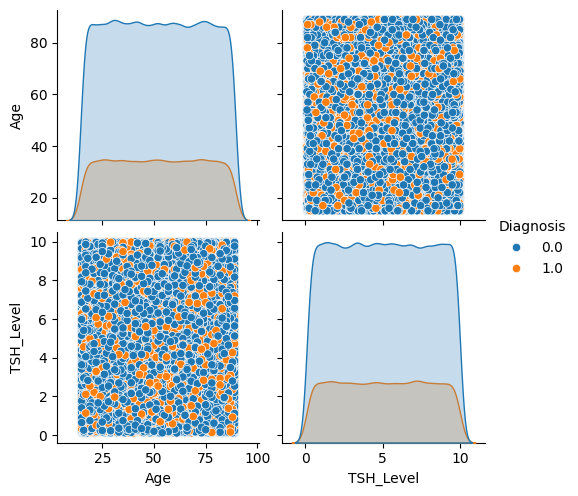

In [109]:
sns.pairplot(df[cols_to_plot], hue="Diagnosis")

In [110]:
cols_to_plot = [
    "T3_Level",
    "T4_Level",
    "Nodule_Size",
    'Diagnosis'
]

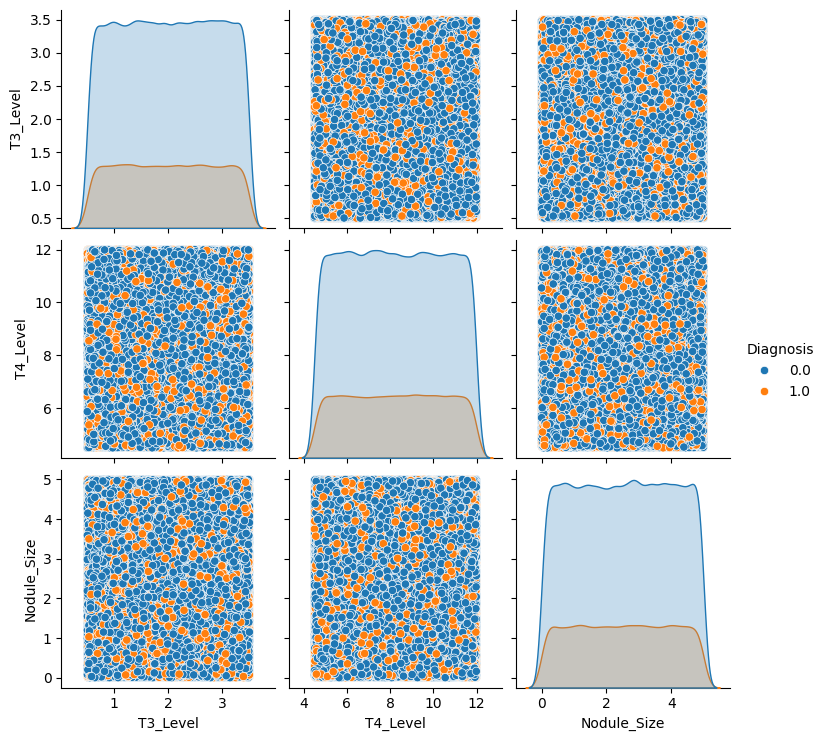

In [111]:
sns.pairplot(df[cols_to_plot], hue="Diagnosis")

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [113]:
forest = RandomForestClassifier(n_estimators=100)

In [114]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [115]:
cross_val_score(
    forest,
    X,
    y,
)

array([0.82336209, 0.82599088, 0.82413372, 0.82490949, 0.82472143])

In [ ]:
# from sklearn.model_selection 

In [116]:
from sklearn.pipeline import Pipeline